In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
pd.set_option('max_columns',None)

In [2]:
#Importing the CSV file
data=pd.read_csv(r'C:\Users\satvi\OneDrive\Desktop\temperature.csv')
data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
#Checking for the shape of the data
data.shape

(7752, 25)

There are 7752 rows and 25 columns in the dataset

In [4]:
#Checking for null method
data.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Almost all the columns having null values except in 5 columns.Will try filling the null values.

In [5]:
#Checking for info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


All the data in the columns are float type only datae column is object type since it has special characters will try seperating them since our model cannot understand string type data.

In [6]:
data.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

### PreProcessing

In [7]:
#Filling the null values for numerical columns using mean method
data['station']=data['station'].fillna(data['station'].mean())
data['Present_Tmax']=data['Present_Tmax'].fillna(data['Present_Tmax'].mean())
data['Present_Tmin']=data['Present_Tmin'].fillna(data['Present_Tmin'].mean())
data['LDAPS_RHmin']=data['LDAPS_RHmin'].fillna(data['LDAPS_RHmin'].mean())
data['LDAPS_RHmax']=data['LDAPS_RHmax'].fillna(data['LDAPS_RHmax'].mean())
data['LDAPS_Tmax_lapse']=data['LDAPS_Tmax_lapse'].fillna(data['LDAPS_Tmax_lapse'].mean())
data['LDAPS_Tmin_lapse']=data['LDAPS_Tmin_lapse'].fillna(data['LDAPS_Tmin_lapse'].mean())
data['LDAPS_WS']=data['LDAPS_WS'].fillna(data['LDAPS_WS'].mean())
data['LDAPS_LH']=data['LDAPS_LH'].fillna(data['LDAPS_LH'].mean())
data['LDAPS_CC1']=data['LDAPS_CC1'].fillna(data['LDAPS_CC1'].mean())
data['LDAPS_CC2']=data['LDAPS_CC2'].fillna(data['LDAPS_CC2'].mean())
data['LDAPS_CC3']=data['LDAPS_CC3'].fillna(data['LDAPS_CC3'].mean())
data['LDAPS_CC4']=data['LDAPS_CC4'].fillna(data['LDAPS_CC4'].mean())
data['LDAPS_PPT1']=data['LDAPS_PPT1'].fillna(data['LDAPS_PPT1'].mean())
data['LDAPS_PPT2']=data['LDAPS_PPT2'].fillna(data['LDAPS_PPT2'].mean())
data['LDAPS_PPT3']=data['LDAPS_PPT3'].fillna(data['LDAPS_PPT3'].mean())
data['LDAPS_PPT4']=data['LDAPS_PPT4'].fillna(data['LDAPS_PPT4'].mean())
data['Next_Tmax']=data['Next_Tmax'].fillna(data['Next_Tmax'].mean())
data['Next_Tmin']=data['Next_Tmin'].fillna(data['Next_Tmin'].mean())

In [8]:
#Filling the null values for categorical columns using mode method
data['Date']=data['Date'].fillna(data['Date'].mode()[0])

In [9]:
data.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7752 non-null   float64
 1   Date              7752 non-null   object 
 2   Present_Tmax      7752 non-null   float64
 3   Present_Tmin      7752 non-null   float64
 4   LDAPS_RHmin       7752 non-null   float64
 5   LDAPS_RHmax       7752 non-null   float64
 6   LDAPS_Tmax_lapse  7752 non-null   float64
 7   LDAPS_Tmin_lapse  7752 non-null   float64
 8   LDAPS_WS          7752 non-null   float64
 9   LDAPS_LH          7752 non-null   float64
 10  LDAPS_CC1         7752 non-null   float64
 11  LDAPS_CC2         7752 non-null   float64
 12  LDAPS_CC3         7752 non-null   float64
 13  LDAPS_CC4         7752 non-null   float64
 14  LDAPS_PPT1        7752 non-null   float64
 15  LDAPS_PPT2        7752 non-null   float64
 16  LDAPS_PPT3        7752 non-null   float64


In [11]:
data

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,13.0,01-07-2013,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [12]:
data.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.210637,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,0.261185,0.256810,0.249148,0.253114,1.936331,1.754258,1.156174,1.200364,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,0.142328,0.103100,0.082741,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,0.315667,0.265264,0.232354,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,0.554963,0.494007,0.497230,0.067593,0.024276,0.009697,0.000693,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In describe method we can know the mean values minimum values,50%,75%,max values of different data.The data seems to be normal.

In [13]:
#I feel Date is not required for our prediction
data.drop(columns=['Date'],axis=1,inplace=True)

In [14]:
data

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,13.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


All the columns are continous which means numeric data,lets plot distribution plot and check how the data is distributed in the columns.

In [15]:
#In order to predict I feel station number is not required so am dropping that column
data.drop(columns=['station'],axis=1,inplace=True)

In [16]:
data

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Present_Tmax      7752 non-null   float64
 1   Present_Tmin      7752 non-null   float64
 2   LDAPS_RHmin       7752 non-null   float64
 3   LDAPS_RHmax       7752 non-null   float64
 4   LDAPS_Tmax_lapse  7752 non-null   float64
 5   LDAPS_Tmin_lapse  7752 non-null   float64
 6   LDAPS_WS          7752 non-null   float64
 7   LDAPS_LH          7752 non-null   float64
 8   LDAPS_CC1         7752 non-null   float64
 9   LDAPS_CC2         7752 non-null   float64
 10  LDAPS_CC3         7752 non-null   float64
 11  LDAPS_CC4         7752 non-null   float64
 12  LDAPS_PPT1        7752 non-null   float64
 13  LDAPS_PPT2        7752 non-null   float64
 14  LDAPS_PPT3        7752 non-null   float64
 15  LDAPS_PPT4        7752 non-null   float64
 16  lat               7752 non-null   float64


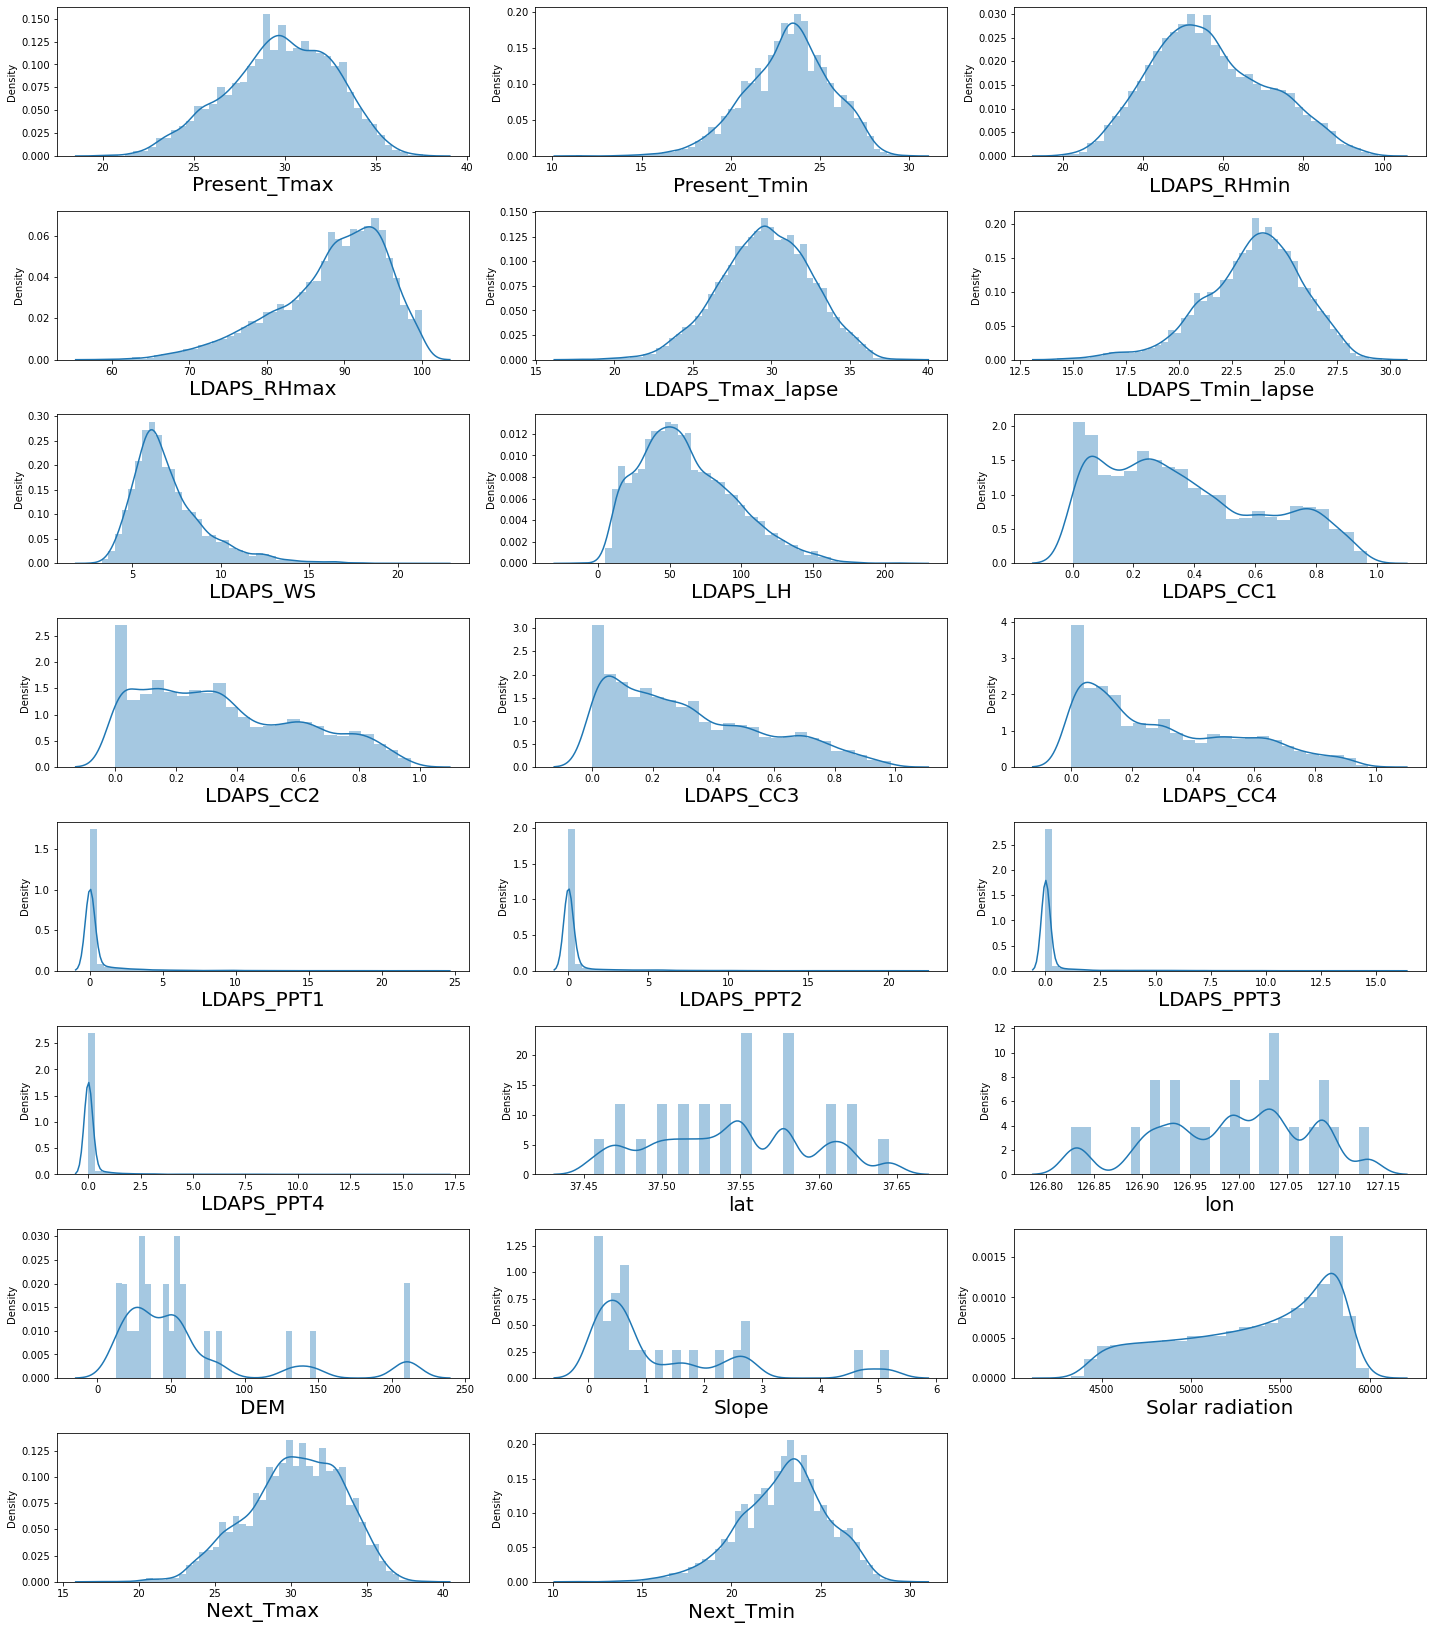

In [18]:
#lets plot distribution plot and check how the data distributed in our columns
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=27:
        ax=plt.subplot(9,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


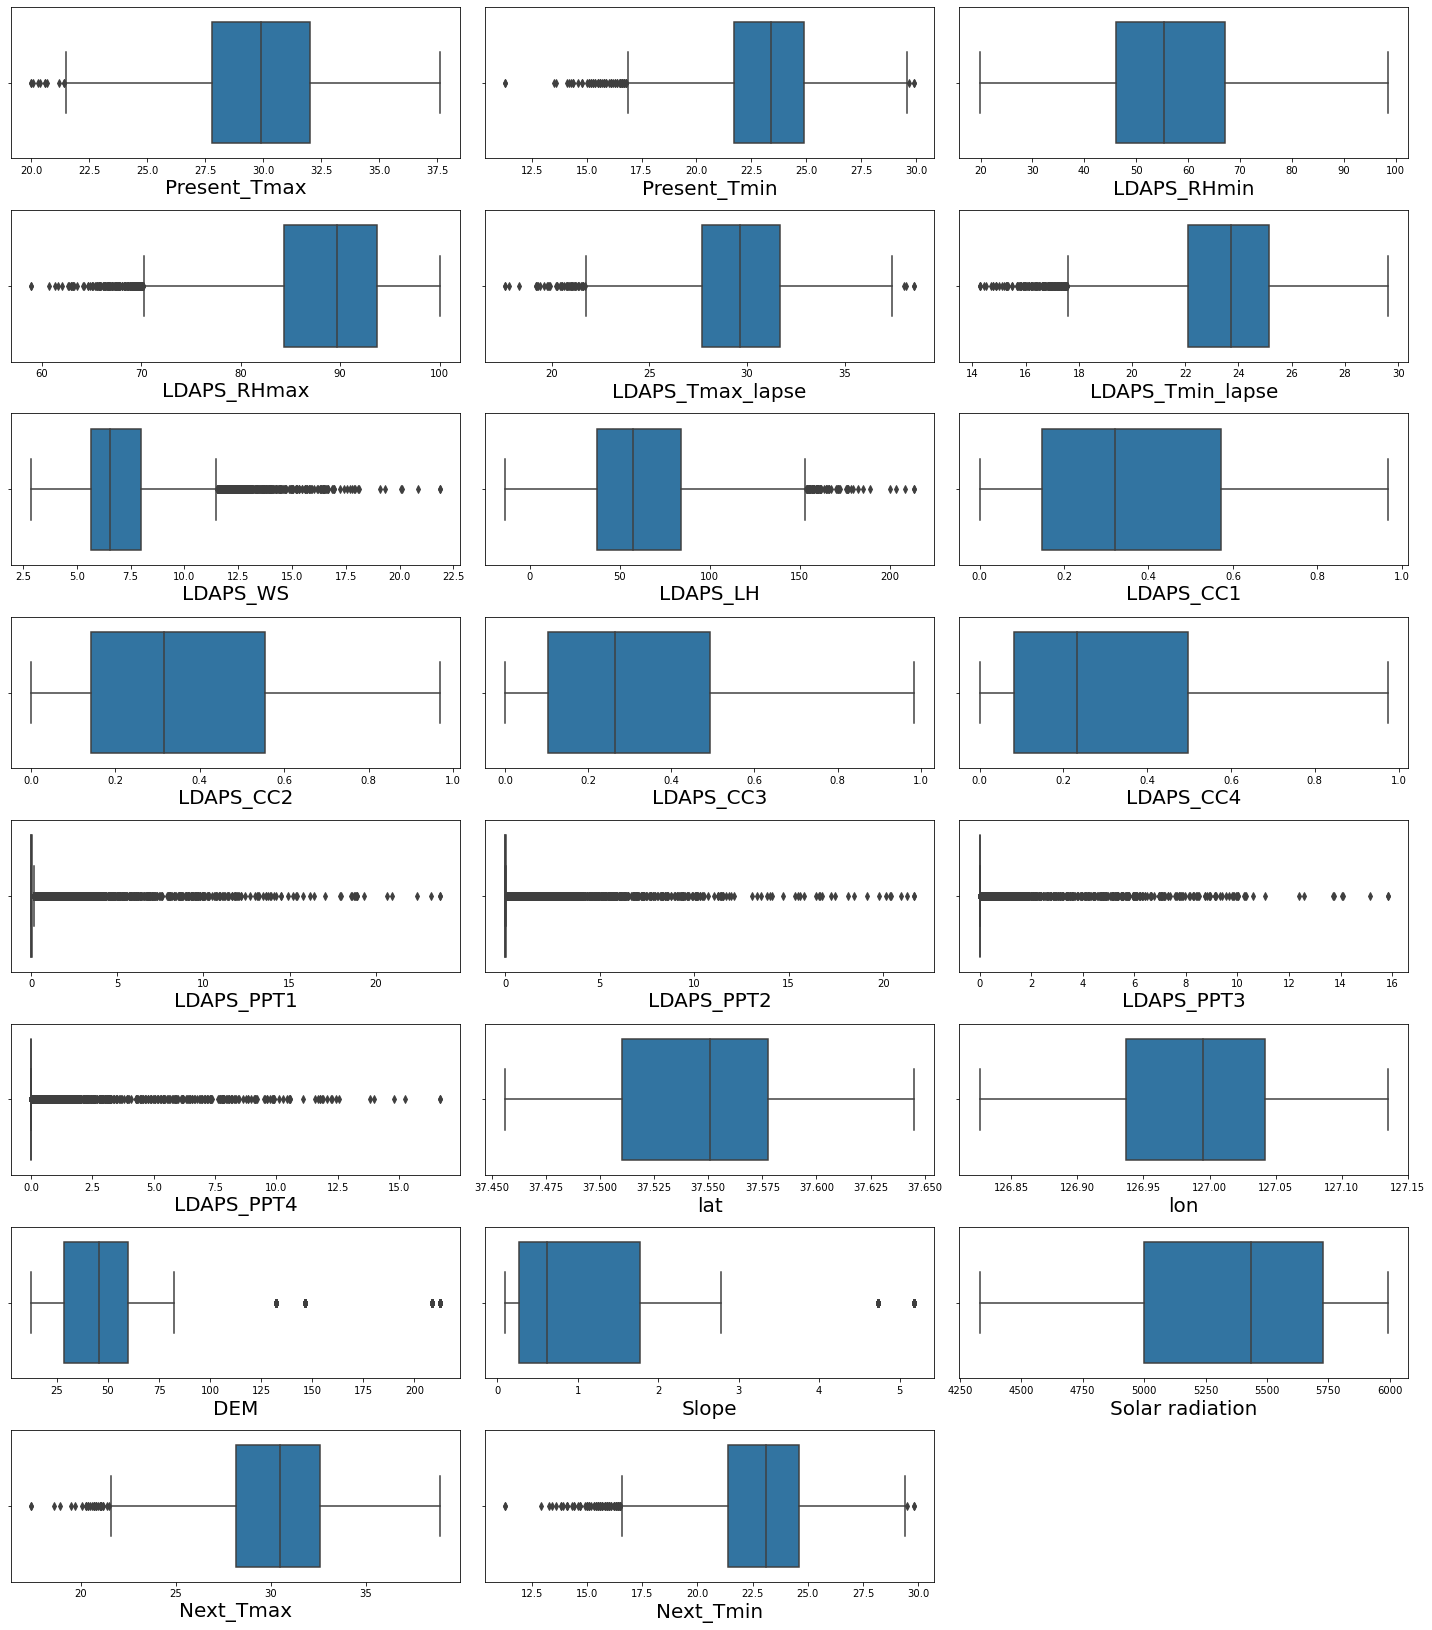

In [19]:
#Lets check the boxplot and visualise
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=27:
        ax=plt.subplot(9,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


In [20]:
#importing the stats from the scipy library
from scipy import stats
#lets remove our ouliers using z_score
z=np.abs(stats.zscore(data))#abs=absolute numberprint(z)
print(z)

[[0.36132577 0.75952931 0.10251523 ... 1.51793488 0.37628214 0.6975993 ]
 [0.72108401 0.6762959  0.30802721 ... 1.22994952 0.07209725 0.17406357]
 [0.61960809 0.03118815 0.55281415 ... 1.21653443 0.26425985 0.38974413]
 ...
 [2.22171758 2.42419767 2.31750374 ... 2.0743251  0.79263444 2.2279345 ]
 [3.30412736 4.9628169  2.5325175  ... 2.35821196 4.12345278 4.68452522]
 [2.64912642 2.77789093 2.86141898 ... 1.51793488 2.76237361 2.76579089]]


In [21]:
#Rows having outliers more than 3 standard deviation
print('Row Numbers \n',np.where(z>3)[0])

Row Numbers 
 [  25   25   26 ... 7751 7751 7751]


In [22]:
#dropping some of the data of rows which r having outliers
index=(np.where(z>3)[0])
data=data.drop(data.index[index])

In [23]:
data.shape

(6894, 23)

In [24]:
data.skew()

Present_Tmax       -0.272653
Present_Tmin       -0.225479
LDAPS_RHmin         0.305740
LDAPS_RHmax        -0.688257
LDAPS_Tmax_lapse   -0.109372
LDAPS_Tmin_lapse   -0.382667
LDAPS_WS            1.087781
LDAPS_LH            0.568781
LDAPS_CC1           0.593990
LDAPS_CC2           0.500911
LDAPS_CC3           0.700217
LDAPS_CC4           0.710930
LDAPS_PPT1          3.731226
LDAPS_PPT2          4.843672
LDAPS_PPT3          5.482625
LDAPS_PPT4          5.927822
lat                 0.108251
lon                -0.275508
DEM                 1.764031
Slope               1.593600
Solar radiation    -0.505353
Next_Tmax          -0.270084
Next_Tmin          -0.237767
dtype: float64

The skewness should be in the range of -0.5 to 0.5 but in some of the columns the skewness is more so lets use log transformation and remove some of the skewness from the data.

### Log Transformation

In [25]:


data['LDAPS_RHmax']=np.log(1+data['LDAPS_RHmax'])
data['LDAPS_WS']=np.log(1+data['LDAPS_WS'])
data['LDAPS_CC1']=np.log(1+data['LDAPS_CC1'])
data['LDAPS_CC2']=np.log(1+data['LDAPS_CC2'])
data['LDAPS_CC3']=np.log(1+data['LDAPS_CC3'])
data['LDAPS_CC4']=np.log(1+data['LDAPS_CC4'])
data['LDAPS_PPT1']=np.log(1+data['LDAPS_PPT1'])
data['LDAPS_PPT2']=np.log(1+data['LDAPS_PPT2'])
data['LDAPS_PPT3']=np.log(1+data['LDAPS_PPT3'])
data['LDAPS_PPT4']=np.log(1+data['LDAPS_PPT4'])
data['DEM']=np.log(1+data['DEM'])
data['Slope']=np.log(1+data['Slope'])

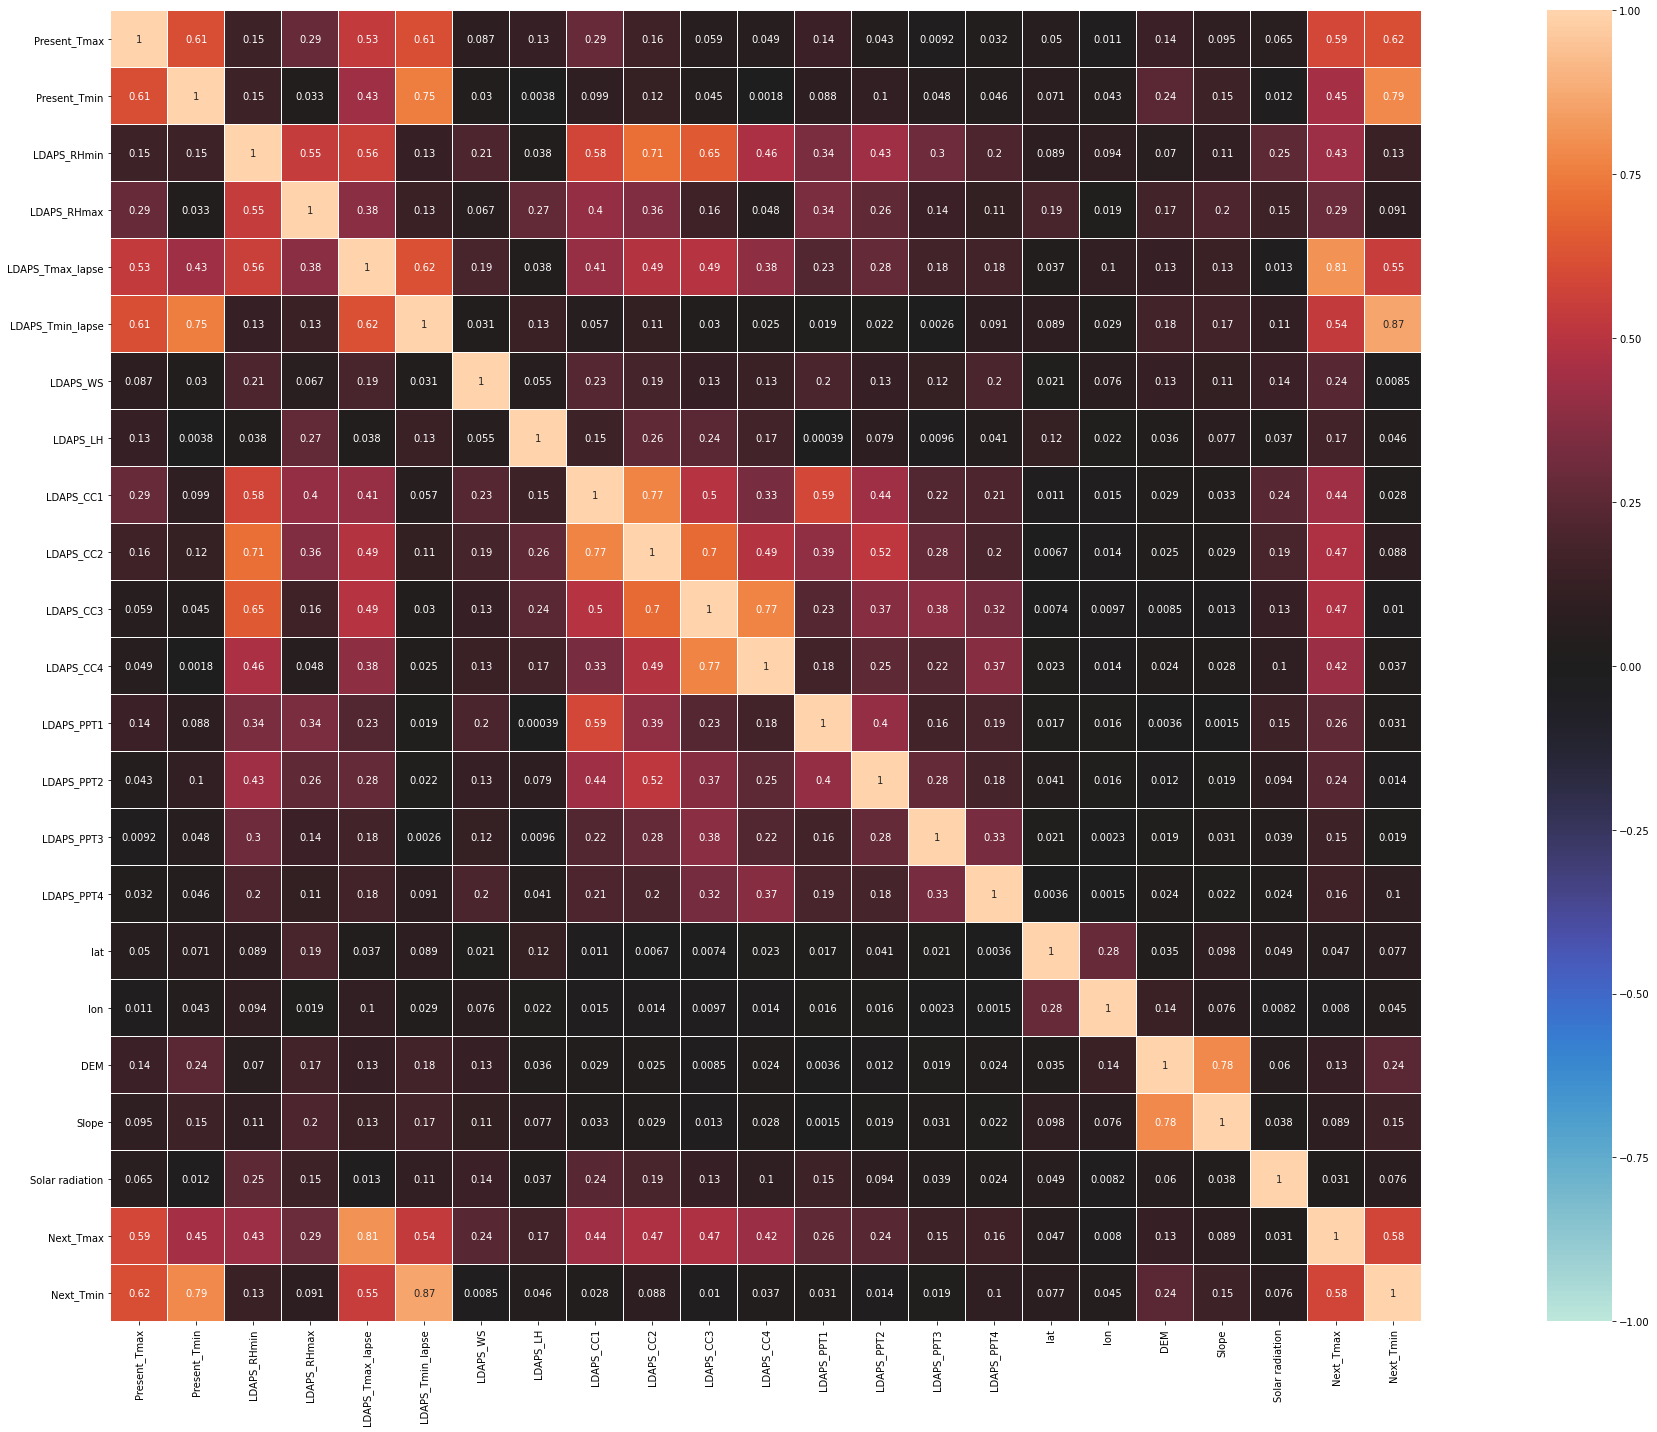

In [26]:
#Plotting the heat map to check the correlation with the features to features and label to features
df_corr=data.corr().abs()
plt.figure(figsize=(35,20))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidth=.1)
plt.tight_layout()

Our labels are highly correlated with each other,and also highly correlated with the features next_Tmax and next_Tmin,our labels are very less correlated with longitude and also LDAPS cc4.There is also multicollinearity exists with Dem and slope,between LDAPS_Tmax_lapse and Next_Tmax,between LDAPS_Tminapse and Next_Tmin and collinearity exists with some other columns too.

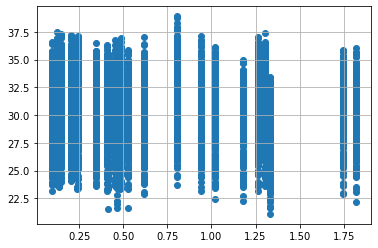

In [27]:
plt.scatter(x=data['Slope'], y=data['Next_Tmax'])
plt.grid(True)

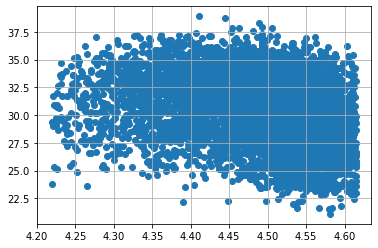

In [28]:
plt.scatter(x=data['LDAPS_RHmax'], y=data['Next_Tmax'])
plt.grid(True)

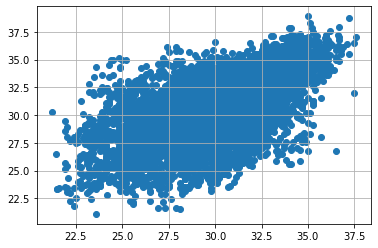

In [29]:
plt.scatter(x=data['Present_Tmax'], y=data['Next_Tmax'])
plt.grid(True)

highly correlated with our label.

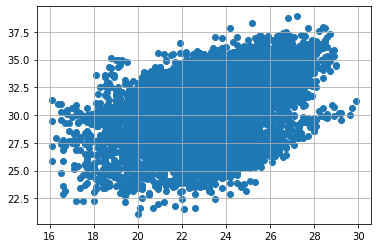

In [30]:
plt.scatter(x=data['Present_Tmin'], y=data['Next_Tmax'])
plt.grid(True)

present tmin also highly correlated with our label

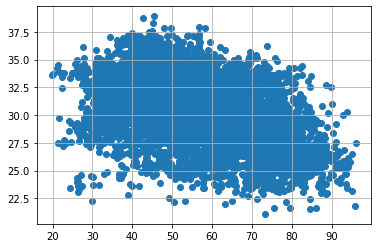

In [31]:
plt.scatter(x=data['LDAPS_RHmin'], y=data['Next_Tmax'])
plt.grid(True)

This is less corrleated with our feature

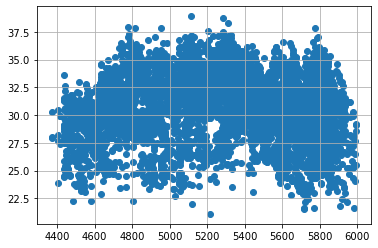

In [32]:
plt.scatter(x=data['Solar radiation'], y=data['Next_Tmax'])
plt.grid(True)

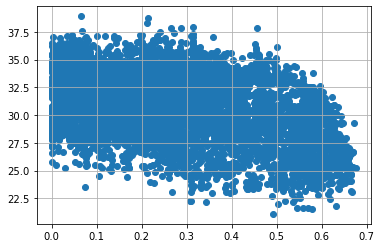

In [33]:
plt.scatter(x=data['LDAPS_CC1'], y=data['Next_Tmax'])
plt.grid(True)

Not corrleated with our label.

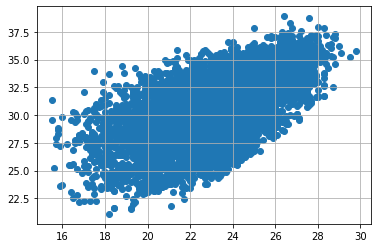

In [34]:

plt.scatter(x=data['Next_Tmin'], y=data['Next_Tmax'])
plt.grid(True)

Highly correlated with our label.

### Prediction for Next_Tmax

In [35]:
#Am seperating the features and labels
x=data.drop(columns=['Next_Tmax'],axis=1)
y=data['Next_Tmax']

In [36]:
x.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin
0,28.7,21.4,58.255688,4.523053,28.074101,23.006936,2.056542,69.451805,0.210218,0.185563,0.149882,0.123039,0.0,0.0,0.0,0.0,37.6046,126.991,5.362864,1.331046,5992.895996,21.2
1,31.9,21.6,52.263397,4.517483,29.850689,24.035009,1.900896,51.937448,0.203356,0.224560,0.147941,0.120204,0.0,0.0,0.0,0.0,37.6046,127.032,3.823463,0.414821,5869.312500,22.5
2,31.6,23.3,48.690479,4.442340,30.091292,24.565633,1.965464,20.573050,0.190078,0.229101,0.185725,0.132891,0.0,0.0,0.0,0.0,37.5776,127.058,3.535344,0.235941,5863.555664,23.9
3,32.0,23.4,58.239788,4.579685,29.704629,23.326177,1.894624,65.727144,0.195873,0.203759,0.149417,0.125970,0.0,0.0,0.0,0.0,37.6450,127.022,3.844087,1.262657,5856.964844,24.3
4,31.4,21.9,56.174095,4.512563,29.113934,23.486480,1.907318,107.965535,0.140985,0.223140,0.164575,0.157022,0.0,0.0,0.0,0.0,37.5507,127.135,3.584574,0.409125,5859.552246,22.5


In [37]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6894 entries, 0 to 7749
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Present_Tmax      6894 non-null   float64
 1   Present_Tmin      6894 non-null   float64
 2   LDAPS_RHmin       6894 non-null   float64
 3   LDAPS_RHmax       6894 non-null   float64
 4   LDAPS_Tmax_lapse  6894 non-null   float64
 5   LDAPS_Tmin_lapse  6894 non-null   float64
 6   LDAPS_WS          6894 non-null   float64
 7   LDAPS_LH          6894 non-null   float64
 8   LDAPS_CC1         6894 non-null   float64
 9   LDAPS_CC2         6894 non-null   float64
 10  LDAPS_CC3         6894 non-null   float64
 11  LDAPS_CC4         6894 non-null   float64
 12  LDAPS_PPT1        6894 non-null   float64
 13  LDAPS_PPT2        6894 non-null   float64
 14  LDAPS_PPT3        6894 non-null   float64
 15  LDAPS_PPT4        6894 non-null   float64
 16  lat               6894 non-null   float64


In [38]:
#Transforming data to remove skewness
#Importing power transform
from sklearn.preprocessing import power_transform
x=power_transform(x,method=('yeo-johnson'))
x

array([[-0.48019841, -0.84787568,  0.25523904, ...,  1.29390976,
         1.88926606, -0.82315247],
       [ 0.66852579, -0.76596533, -0.17775386, ..., -0.32513693,
         1.43412045, -0.29026474],
       [ 0.55534197, -0.04509429, -0.44872177, ..., -0.93646402,
         1.41376967,  0.31251014],
       ...,
       [-2.12825143, -2.4591396 , -2.41661677, ..., -1.32646308,
        -1.7858899 , -1.98830735],
       [-2.12825143, -2.25167386, -2.71186278, ..., -1.07920492,
        -1.79208955, -1.73832137],
       [-2.15536702, -2.35611829, -2.83797723, ..., -0.92039525,
        -1.77575678, -2.23057317]])

In [39]:
#Scailing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-0.48019841, -0.84787568,  0.25523904, ...,  1.29390976,
         1.88926606, -0.82315247],
       [ 0.66852579, -0.76596533, -0.17775386, ..., -0.32513693,
         1.43412045, -0.29026474],
       [ 0.55534197, -0.04509429, -0.44872177, ..., -0.93646402,
         1.41376967,  0.31251014],
       ...,
       [-2.12825143, -2.4591396 , -2.41661677, ..., -1.32646308,
        -1.7858899 , -1.98830735],
       [-2.12825143, -2.25167386, -2.71186278, ..., -1.07920492,
        -1.79208955, -1.73832137],
       [-2.15536702, -2.35611829, -2.83797723, ..., -0.92039525,
        -1.77575678, -2.23057317]])

In [40]:
#splitting the data into train,test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=55)

In [41]:
#importing the algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
#lets import some of the evaluation metrics for classification problem
from sklearn.metrics import mean_squared_error,mean_absolute_error
#importing grid search cv for hyper parameter tuning and cross validation score for testing our model
from sklearn.model_selection import GridSearchCV,cross_val_score

### Linear Regression

In [42]:
#Fitting the model
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

### Prediction

In [43]:
#prediction
y_pred=lr.predict(x_test)
y_pred

array([24.83382348, 34.48785922, 35.53756706, ..., 30.27762756,
       32.68972552, 32.02900601])

### Scores

In [44]:
#Training score
lr.score(x_train,y_train)

0.7767032430680961

In [45]:
#Checking the score
lr.score(x_test,y_test)

0.7539101617513728

### Cross validation score

In [46]:
#Checking the cross validation score
np.mean(cross_val_score(lr,x,y,cv=5))

0.7007303943514025

### Error calculation

In [47]:
#Mean squared value
mean_squared_error(y_test,y_pred)

1.9999276865436422

In [48]:
mean_absolute_error(y_test,y_pred)

1.0871403108411366

In [49]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.4141879954743082

### KNeighborsClassifier

In [50]:
#Knn
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

### prediction

In [51]:
y_pred_knn=knn.predict(x_test)
y_pred_knn

array([23.66, 33.72, 35.8 , ..., 28.58, 33.16, 31.04])

### Scores

In [52]:
knn.score(x_train,y_train)

0.9082247237628569

In [53]:
knn.score(x_test,y_test)

0.8521713209653564

### Cross validation score

In [54]:
np.mean(cross_val_score(knn,x,y,cv=5))

0.5765586282573119

### Error calculation

In [55]:
mean_squared_error(y_test,y_pred_knn)

1.201376985618815

In [56]:
mean_absolute_error(y_test,y_pred_knn)

0.8185730858468677

In [57]:
np.sqrt(mean_squared_error(y_test,y_pred_knn))

1.0960734398838496

### Random Forest Regressor

In [58]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

### Prediction

In [59]:
y_pred_rf=rf.predict(x_test)
y_pred

array([24.83382348, 34.48785922, 35.53756706, ..., 30.27762756,
       32.68972552, 32.02900601])

### Scores

In [60]:
rf.score(x_train,y_train)

0.9846448185457196

In [61]:
rf.score(x_test,y_test)

0.8844843026890181

### Cross validation score

In [62]:
np.mean(cross_val_score(rf,x,y,cv=5))

0.6810299385703018

### Error Calculation

In [63]:
mean_squared_error(y_test,y_pred_rf)

0.9387752169157937

In [64]:
mean_absolute_error(y_test,y_pred_rf)

0.709421071640424

In [65]:
np.sqrt(mean_squared_error(y_test,y_pred_rf))

0.9689041319531018


### Decision Tree Regressor

In [66]:
dt= DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

### Prediction

In [67]:
y_pred_dt=dt.predict(x_test)

### scores

In [68]:
dt.score(x_train,y_train)

1.0

In [69]:
dt.score(x_test,y_test)

0.7577678805181224

### Cross validation score

In [70]:
np.mean(cross_val_score(dt,x,y,cv=5))

0.4246487442575518

### Error calculation

In [71]:
mean_squared_error(y_test,y_pred_dt)

1.9685767025963623

In [72]:
mean_absolute_error(y_test,y_pred_dt)

1.0044806613655306

In [73]:
np.sqrt(mean_squared_error(y_test,y_pred_dt))

1.4030597644421148

### Support Vector Regressor

In [74]:
svm=SVR()
svm.fit(x_train,y_train)

SVR()

### Prediction

In [75]:
y_pred_svm=svm.predict(x_test)

### Scores

In [76]:
svm.score(x_train,y_train)

0.8924469517422258

In [77]:
svm.score(x_test,y_test)

0.8659849147964396

In [78]:
np.mean(cross_val_score(svm,x,y,cv=5))

0.6741004798788448

### Error Calculation

In [79]:
mean_squared_error(y_test,y_pred_dt)

1.9685767025963623

In [80]:
mean_absolute_error(y_test,y_pred_dt)

1.0044806613655306

In [81]:
np.sqrt(mean_squared_error(y_test,y_pred_dt))

1.4030597644421148

### Extreme Gradient Boosting Regressor

In [82]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### prediction

In [83]:
y_pred_xgb=xgb.predict(x_test)

### Scores

In [84]:
xgb.score(x_train,y_train)

0.9907335427521727

In [85]:
xgb.score(x_test,y_test)

0.903621663189872

In [86]:
np.mean(cross_val_score(xgb,x,y,cv=5))

0.6539021182353923

### Error calculation

In [87]:

mean_squared_error(y_test,y_pred_xgb)

0.7832493431722528

In [88]:

mean_absolute_error(y_test,y_pred_xgb)

0.6657033794487776

In [89]:
np.sqrt(mean_squared_error(y_test,y_pred_xgb))

0.8850137530977995

### Linear Regression

Compared to all the scores and cross validation scores of linear regression as less difference so am considering linear regression as my model for prediction Next_Tmax temperature.

But lets check weather our model has overfitting problem using Regularisation methods Lasso Or Ridge.

### Regularisation

Checking weather the model is overfitting or not

### LassoCV

In [90]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [91]:
lasscv=LassoCV(alphas=None,max_iter=1000,normalize=True)

In [92]:
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [93]:
alpha=lasscv.alpha_
alpha

3.324385461030084e-05

In [94]:
lass_reg=Lasso(alpha)
lass_reg.fit(x_train,y_train)

Lasso(alpha=3.324385461030084e-05)

In [95]:
lass_reg.score(x_test,y_test)

0.7539139637918428

The scores for linear regression model and lassocv has same scores so as the scores are same we can say that our model is not overfitting.

### Hyper Parameter Tuning

### Linear Regression

In [96]:
Final_model = LinearRegression(fit_intercept = True, normalize = True, copy_X = True, n_jobs = -1)
Final_model.fit(x_train,y_train)

LinearRegression(n_jobs=-1, normalize=True)

In [97]:
y_pred_lr=Final_model.predict(x_test)

In [98]:
Final_model.score(x_train,y_train)

0.7767032430680962

In [99]:
Final_model.score(x_test,y_test)

0.753910161751373

There is no improvement in the score after using the hyper parameter tuning.So,almost we can hit score of 75% using Linear Regression.So our best model is linear regression for predicting the Next_Tmax.

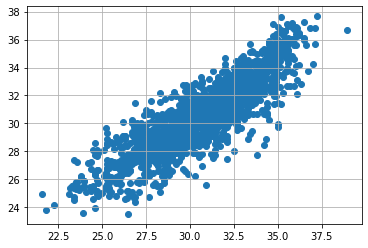

In [100]:
#Scatter plot
plt.scatter(x=y_test, y=y_pred_lr)
plt.grid(True)

The predicted and actual data seems to be uniformly distributed.

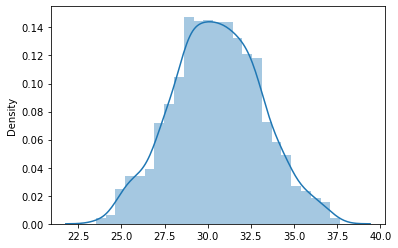

In [101]:
#dist plot to check the predicted data
sns.distplot(y_pred_lr)
plt.show()

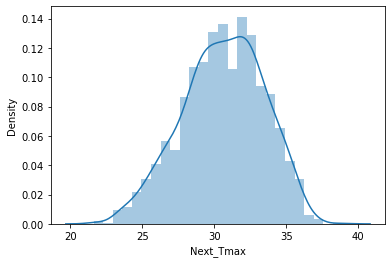

In [102]:
#dist plot to check the Actual data
sns.distplot(y_test)
plt.show()

### Saving the Model

In [103]:
#Saving MOdel.
import joblib
joblib.dump(Final_model,'Next_Tmax Temperature prediction.csv')

['Next_Tmax Temperature prediction.csv']

In [104]:
print(y_pred_lr[:20])
print(y_test[:20].values)

[24.83382348 34.48785922 35.53756706 33.13918979 29.65282458 30.46381318
 33.73630734 31.13890499 32.69550945 27.58049428 34.85067912 28.74840669
 29.6555667  29.56946698 27.3732346  31.99592333 34.1149859  30.8469382
 29.56019724 28.3741786 ]
[24.8 33.9 34.8 36.1 30.  29.4 33.  33.3 35.9 27.4 35.5 30.3 30.6 32.7
 25.3 33.4 36.  33.3 29.6 31.7]


For the train data and test data scores are almost near so we can say our model prediction is good.

### Prediction for Next_Tmin

In [105]:
#Splitting the data in X and Y variables

In [106]:
X=data.drop(columns=['Next_Tmin'])
Y=data['Next_Tmin']

In [107]:
X

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,28.7,21.4,58.255688,4.523053,28.074101,23.006936,2.056542,69.451805,0.210218,0.185563,1.498817e-01,0.123039,0.0,0.0,0.0,0.0,37.6046,126.991,5.362864,1.331046,5992.895996,29.1
1,31.9,21.6,52.263397,4.517483,29.850689,24.035009,1.900896,51.937448,0.203356,0.224560,1.479406e-01,0.120204,0.0,0.0,0.0,0.0,37.6046,127.032,3.823463,0.414821,5869.312500,30.5
2,31.6,23.3,48.690479,4.442340,30.091292,24.565633,1.965464,20.573050,0.190078,0.229101,1.857253e-01,0.132891,0.0,0.0,0.0,0.0,37.5776,127.058,3.535344,0.235941,5863.555664,31.1
3,32.0,23.4,58.239788,4.579685,29.704629,23.326177,1.894624,65.727144,0.195873,0.203759,1.494173e-01,0.125970,0.0,0.0,0.0,0.0,37.6450,127.022,3.844087,1.262657,5856.964844,31.7
4,31.4,21.9,56.174095,4.512563,29.113934,23.486480,1.907318,107.965535,0.140985,0.223140,1.645754e-01,0.157022,0.0,0.0,0.0,0.0,37.5507,127.135,3.584574,0.409125,5859.552246,31.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,23.1,17.8,24.688997,4.372751,27.812697,18.303014,2.028576,9.614074,0.051550,0.029723,0.000000e+00,0.004370,0.0,0.0,0.0,0.0,37.5507,127.040,3.306813,0.452412,4456.024414,27.6
7746,22.5,17.4,30.094858,4.438998,26.704905,17.814038,1.912218,82.146707,0.064346,0.024223,5.849998e-07,0.017523,0.0,0.0,0.0,0.0,37.5102,127.086,3.134050,0.125045,4441.803711,28.0
7747,23.3,17.1,26.741310,4.380399,26.352081,18.775678,1.966961,72.058294,0.029592,0.077919,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5372,126.891,2.808655,0.144447,4443.313965,28.3
7748,23.3,17.7,24.040634,4.360483,27.010193,18.733519,2.020596,47.241457,0.035245,0.072286,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5237,126.909,2.906661,0.200734,4438.373535,28.6


In [108]:
Y

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7745    17.7
7746    17.1
7747    18.1
7748    18.8
7749    17.4
Name: Next_Tmin, Length: 6894, dtype: float64

In [109]:
#Scailing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.45731707, 0.38405797, 0.50358031, ..., 0.71629531, 1.        ,
        0.4494382 ],
       [0.65243902, 0.39855072, 0.42512167, ..., 0.18579066, 0.9237709 ,
        0.52808989],
       [0.63414634, 0.52173913, 0.37834051, ..., 0.08221714, 0.92021995,
        0.56179775],
       ...,
       [0.12804878, 0.07246377, 0.09095424, ..., 0.02924066, 0.04418264,
        0.40449438],
       [0.12804878, 0.11594203, 0.05559358, ..., 0.0618319 , 0.04113527,
        0.42134831],
       [0.12195122, 0.0942029 , 0.04109121, ..., 0.08459033, 0.04913649,
        0.37640449]])

### Train test split

In [110]:
#splitting the data into train,test data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=55)

### Linear Regression

In [111]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

### Prediction

In [112]:
Y_pred_lr=lr.predict(X_test)
Y_pred_lr

array([17.6321199 , 26.60757338, 25.35895319, ..., 21.32296176,
       26.2100295 , 20.9268004 ])

### Scores

In [113]:
lr.score(X_train,Y_train)

0.8390384866217879

In [114]:
#Checking the scores
lr.score(X_test,Y_test)

0.8295158414065933

In [115]:
#Checking the cross validation score
np.mean(cross_val_score(lr,X,Y,cv=5))

0.7882117895182625

### Error Calculation

In [116]:
#Mean squared value
mean_squared_error(Y_test,Y_pred_lr)

0.9617565914842976

In [117]:
mean_absolute_error(Y_test,Y_pred_lr)

0.7763238215275629

In [118]:
np.sqrt(mean_squared_error(Y_test,Y_pred_lr))

0.980691894268683

### Kneighbors Regressor

In [119]:
#Knn
knn=KNeighborsRegressor()
knn.fit(X_train,Y_train)

KNeighborsRegressor()

### Prediction

In [120]:
Y_pred_knn=knn.predict(X_test)
Y_pred_knn

array([18.9 , 25.56, 26.14, ..., 21.78, 25.42, 21.26])

### Scores

In [121]:
knn.score(X_train,Y_train)

0.904814523540447

In [124]:
knn.score(X_test,Y_test)

0.8493758044824409

In [125]:
#Checking the cross validation score
np.mean(cross_val_score(knn,X,Y,cv=5))

0.5974938004846038

### Error calculation

In [126]:
#Mean squared value
mean_squared_error(Y_test,Y_pred_knn)

0.8497200799842207

In [127]:

mean_absolute_error(Y_test,Y_pred_knn)

0.6980563317039473

In [128]:
np.sqrt(mean_squared_error(Y_test,Y_pred_knn))

0.921802625286032

### Decision Tree Regressor

In [129]:
dt= DecisionTreeRegressor()
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

### Prediction

In [130]:
Y_pred_dt=dt.predict(X_test)



### Scores

In [131]:
dt.score(X_train,Y_train)

1.0

In [132]:
dt.score(X_test,Y_test)

0.7570662448893648

In [133]:
#Checking the cross validation score
np.mean(cross_val_score(dt,X,Y,cv=5))

0.5811021388912918

### Error calculation

In [134]:
#Mean squared value
mean_squared_error(Y_test,Y_pred_dt)

1.3704683308958274

In [135]:
mean_absolute_error(Y_test,Y_pred_dt)

0.8549677726968967

In [136]:
np.sqrt(mean_squared_error(Y_test,Y_pred_dt))

1.1706700350208967

### Random Forest Regressor

In [137]:
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

### Prediction

In [138]:
Y_pred_rf=rf.predict(X_test)

### Scores

In [139]:
rf.score(X_train,Y_train)

0.9860745263634031

In [140]:
rf.score(X_test,Y_test)

0.892655471498613

In [141]:
#Checking the cross validation score
np.mean(cross_val_score(rf,X,Y,cv=5))

0.7875999062639563

### Error calculation

In [142]:
#Mean squared value
mean_squared_error(Y_test,Y_pred_rf)

0.6055654009015687

In [143]:
mean_absolute_error(Y_test,Y_pred_rf)

0.5878206744306536

In [144]:
np.sqrt(mean_squared_error(Y_test,Y_pred_rf))

0.778180827893857

### support Vector Regressor

In [145]:
svm=SVR()
svm.fit(X_train,Y_train)

SVR()

### Prediction

In [146]:
Y_pred_svm=svm.predict(X_test)

### Scores

In [147]:
svm.score(X_train,Y_train)

0.9026125707052992

In [148]:
svm.score(X_test,Y_test)

0.8836633179015616

In [149]:
#Checking the cross validation score
np.mean(cross_val_score(svm,X,Y,cv=5))

0.7767867018369342

### Error Calculation

In [150]:
#Mean squared value
mean_squared_error(Y_test,Y_pred_svm)

0.6562930641927313

In [151]:
mean_absolute_error(Y_test,Y_pred_svm)

0.6229510664971966

In [152]:
np.sqrt(mean_squared_error(Y_test,Y_pred_svm))

0.8101191666617519

### Extreme Gradient Boost

In [153]:
xgb=XGBRegressor()
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Prediction

In [154]:
Y_pred_xgb=xgb.predict(X_test)

### Scores

In [155]:
xgb.score(X_train,Y_train)

0.9921615122928908

In [156]:
xgb.score(X_test,Y_test)

0.9223919277679982

In [157]:
#Checking the cross validation score
np.mean(cross_val_score(xgb,X,Y,cv=5))

0.7697759196133339


### Error calculation

In [158]:
#Mean squared value
mean_squared_error(Y_test,Y_pred_xgb)

0.43781237880012563

In [159]:
mean_absolute_error(Y_test,Y_pred_xgb)

0.5011067280103568

In [160]:
np.sqrt(mean_squared_error(Y_test,Y_pred_xgb))

0.6616739218075061

 Compare to all the other models the linear regression train data score,test data score and cross validation scores are far better compared to other models so am using Linear regression as my model to predict Next_Tmin

But lets check weather our model has overfitting problem using Regularisation methods Lasso Or Ridge.

### Regularisation

### LassoCV

In [161]:
lasscv=LassoCV(alphas=None,max_iter=1000,normalize=True)

In [162]:
lasscv.fit(X_train,Y_train)

LassoCV(normalize=True)

In [163]:
alpha=lasscv.alpha_
alpha

3.0442493847383883e-05

In [164]:
lasso=Lasso(alpha)

In [165]:
lasso.fit(X_train,Y_train)

Lasso(alpha=3.0442493847383883e-05)

In [166]:
lasso.score(X_test,Y_test)

0.8295030216789363

The both scores of linear regression and lassocv are equal so our model is not over fitted

### Hyper Parameter Tuning

### Linear Regression

In [167]:
final_model_Next_Tmin= LinearRegression(fit_intercept =True, normalize = True, copy_X = True, n_jobs = -1)
final_model_Next_Tmin.fit(X_train,Y_train)

LinearRegression(n_jobs=-1, normalize=True)

In [168]:
y_pred_Next_Tmin=final_model_Next_Tmin.predict(X_test)

In [169]:
final_model_Next_Tmin.score(X_train,Y_train)

0.8390384866217879

In [170]:
final_model_Next_Tmin.score(X_test,Y_test)

0.8295158414065933

So our training score and testing scores are same we can say that our model is performing well.So our best fit model for predicting Next_Tmin temperature is Linear Regression.

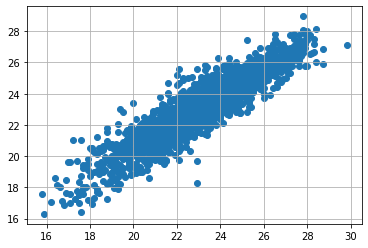

In [171]:
#Scatter plot
plt.scatter(x=Y_test, y=y_pred_Next_Tmin)
plt.grid(True)

Our actual test data and predicted data seems to be uniformly distributed.

<AxesSubplot:xlabel='Next_Tmin', ylabel='Density'>

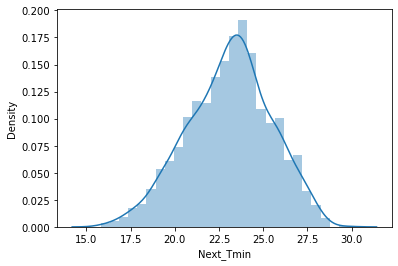

In [172]:
sns.distplot(Y_test)

<AxesSubplot:ylabel='Density'>

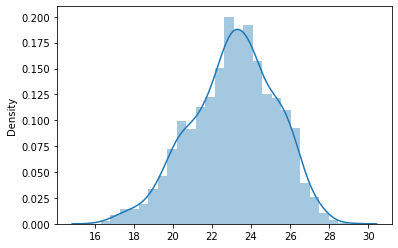

In [173]:
sns.distplot(y_pred_Next_Tmin)

### Saving the model


In [174]:
#Saving MOdel.
import joblib
joblib.dump(final_model_Next_Tmin,'Next_Tmin Temperature prediction.csv')

['Next_Tmin Temperature prediction.csv']

### Conclusion

In [175]:
#Comparing the values
print(y_pred_Next_Tmin[:20])
print(Y_test[:20].values)

[17.6321199  26.60757338 25.35895319 25.14042307 22.49534628 23.92633094
 24.83391656 25.57718828 22.7348121  24.28755346 26.18342335 20.27306409
 25.83513592 25.55572785 22.52291149 26.07159542 24.42686814 24.7072023
 22.56696246 24.1232385 ]
[16.9 25.6 26.4 24.2 23.3 24.2 24.4 24.5 21.4 24.8 25.8 19.8 23.3 26.2
 21.4 26.  25.  23.5 22.3 24.1]


The training score and testing scores are balanced for linear regression with an accuracy of 83%.